In [1]:
import json
from StringIO import StringIO
import pandas as pd

In [2]:
import os
import sklearn as sk
from sklearn.linear_model import MultiTaskLasso, MultiTaskElasticNet, ElasticNet
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import sklearn.metrics as skmet
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, names
import datetime
from scipy.stats import ttest_ind, f_oneway 
import csv

In [5]:
listings_augmented_2018 = pd.read_csv('Datasources\listings_augmented\listings_augmented_2018-05-19_V5.csv', low_memory = False)

In [6]:
import matplotlib.pyplot as plt

In [8]:
listings_augmented_2018 = listings_augmented_2018.drop('distance_from_ocean', axis = 1)

In [10]:
listings_augmented_2018['distance_from_ocean'] = 0
listings_augmented_2018['distance_from_ocean'] = listings_augmented_2018['distance_from_ocean'].astype('float')
    
for w in listings_augmented_2018.index:
    p = float(listings_augmented_2018['latitude'][w])
    q = float(listings_augmented_2018['longitude'][w])
    lon_diff = (q + 117.235585)*np.pi/180
    lat_diff = (p - 32.802458)*np.pi/180
    a = np.sin(lat_diff/2)**2 + np.cos(p*np.pi/180)*np.cos(32.802458*np.pi/180)*(np.sin(lon_diff/2)**2)
    c = np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d = 6371.00*float(c)
    listings_augmented_2018['distance_from_ocean'][w] = d

C:\Users\sanka\Anaconda2\envs\py27\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


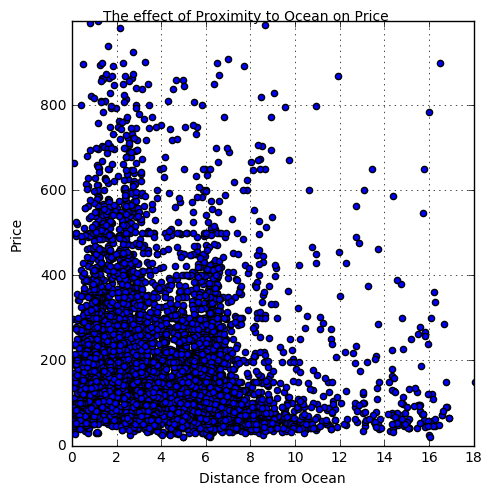

In [18]:
fig, ax = plt.subplots(figsize = (5, 5))
l = ax.scatter(listings_augmented_2018['distance_from_ocean'], listings_augmented_2018['price_y'])
a, b = listings_augmented_2018['distance_from_ocean'].max(), listings_augmented_2018['price_y'].max()
ax.set_xlim((0, 18))
ax.set_ylim((0, b))
ax.set_xlabel('Distance from Ocean')
ax.set_ylabel('Price')
fig.suptitle('The effect of Proximity to Ocean on Price')
fig.tight_layout(pad=1)
ax.grid(True)
plt.show()